1. A cleaning services company compiled the following data related to the annual profit of the firm to its
annual Facebook advertising campaign (measured in thousands) as shown in the table below

| Advertising Expenditure | Profit |
|------------------------|--------|
| 12                     | 60     |
| 14                     | 70     |
| 17                     | 90     |
| 21                     | 100    |
| 26                     | 100    |
| 30                     | 120    |

a) Find the best least squares fit to the data in the form of a straight line given by y = mx + c by
writing a numpy program.

b) Plot the points and least square fit line using matplotlib.

c) Calculate the profit if the company allocates in its next FB campaign with a 50,000 budget allocation. Report the value in $ currency.

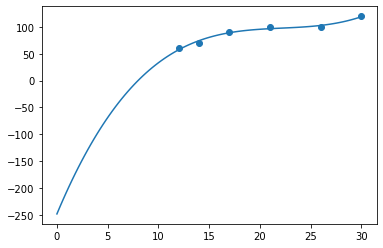

In [22]:
import numpy as np
#Cannot just import matplot lib here. Need pyplot.
import matplotlib.pyplot as plot
#best least squares implies the use of NumPy polyfit

#Let's start by creating arrays that represent the table.
adv_exp = np.array([12, 14, 17, 21, 26, 30])
profit = np.array([60,70,90,100,100,120])

# A best-squares fit is achieved with a degree. We will arbitrarily assume a degree of 3.as_integer_ratio

coefficients = np.polyfit(adv_exp, profit, deg = 3)

x = np.linspace(0,30,100)

y_fit = np.polyval(coefficients, x)

#Creating scatter plot with expense as x axis and profit as y. 
    #Can include a third term label = 'xyz' if desired
plot.scatter(adv_exp, profit)
#This overlays the 'line of best fit'.
plot.plot(x, y_fit)



2) Using code, open and read the contents of the files contained with the “bunchofJSONS.zip”
file. For each file read, enter the contents of the JSON file into a Pandas Dataframe. The value
of the ‘volume’ key in each of the JSON file is expressed in cubic mm. Update each value in
the dataframe to convert the value into cubic inches (using the .apply() or .map() method).
Calculate the total volume of all the objects in cubic inches.

In [45]:
import zipfile
import json
import pandas as pd

#Open the .zip and scrape a list of all files with the .namelist() function:
with zipfile.ZipFile('bunchofJsons.zip', 'r') as bunch_of_jsons:
    #This function is specific to zipfile.
    file_list = bunch_of_jsons.namelist()
#Verify that our file list is working:
# print(file_list[:3])

df_list = []

for file in file_list:
    with zipfile.ZipFile('bunchofJsons.zip', 'r') as bunch_of_jsons:
        with bunch_of_jsons.open(file) as open_file:
            data = json.load(open_file)

    # print(file, data)

    #read through each dictionary key piecemeal and re-write it as a converted value
    #Needed to manually open a .json to find the key here.
    converted_volumes = data['compProperties']["volume"] / 16387.064

    data['converted_volumes'] = converted_volumes

    new_data_frame = pd.DataFrame(data, index = [0])
    df_list.append(new_data_frame)
    
master_dataframe = pd.concat(df_list, ignore_index = True)

total_vol = master_dataframe['converted_volumes'].sum()

print(f"Total volume is: {total_vol}")

Total volume is: 35034.52455916718


3. Read the ‘sales.csv’ file into a pandas dataframe. Split the Location column into two additional
columns of City and State. The new dataframe should retain the original column but with two
additional columns added

4. With respect to the same dataframe created above from sales.csv, answer the following
questions:
a. Which Item‐Type was sold the most?
b. Which Item‐Type generated the most revenue?
c. For items that were sold below 1000 units, which item‐type generated the most
total‐profit?
d. What item‐types were sold in the State – ‘AZ’?

5. Given the following table, write code that perform the following set of steps.

| Column 1 | Column 2 | Column 3 | Column 4 |
|----------|----------|----------|----------|
| A        | B        | C        | D        |
| VINE     | THE WONDER | PIZZA    |          |
| BEAUTY   | SIRE     | NUN      | NONE     |
| COOPERATION | EAST     | NOBODY OF |          |
| NOON     | OOLONG   | THE UNIVERSE |       |
| AIRPLANE | MY       | SUBTERFUGE DEED |    |
| NEVER    | WORLD    | RESIN    | DONOR    |
| TOO      | TWO      | CLOUD    | EVEN     |
| LIES     | SERENDIPITY | PRIZE   | SWIFT    |
| RAPID    | OBOE     | ANYBODY IN |        |
| THE MULTITUDE | SPEEDY | MATHEMATICAL |       |
| PIZZAZZ  | SURE     | DIVERSITY | RUIN     |
| RAINBOW  | WARE     | WEAR     | MOON     |
| SOMEONE OF | STAR    | ABBA     |          |
| KAYAK    | MONOPOLY | ITS      | EYE      |

The above table is stored as a ‘word‐table.csv’ file to be read into a dataframe. The sets of operations to be performed on the above table is as follows:(note, that these operations must operate in the order displayed below. That is the result of operation 1 feeds into operaton 2, which then feeds into operation 3).

Read the table into a Pandas Dataframe
Perform the following operations:
Replace words that appear to the immediate right of the word ‘THE’ with the value ‘NONE’

In columns B and D, replace all words that contain two or more O’s with the value ‘NONE'